# 正则表达式

In [1]:
import re


In [2]:
series = """
'01/18/2014 13:00:00', 10θ ， '1st'; 
'01/18/2014 13:30:00' , 110, '2nd'; 
'01/18/2014 14:00:00' , 120, '3rd' 
"""

In [3]:
dt=re.compile("'[0-9/:\s]+'")

In [4]:
result=dt.findall(series)
result

["'01/18/2014 13:00:00'", "'01/18/2014 13:30:00'", "'01/18/2014 14:00:00'"]

In [6]:
from datetime import datetime

pydt=datetime.strptime(result[0].replace("'",""),'%m/%d/%Y &H:%M:%S')

pydt

ValueError: time data '01/18/2014 13:00:00' does not match format '%m/%d/%Y &H:%M:%S'

In [7]:
from copy import deepcopy
v=[0.5,0.75,1.0,1.5,2.0]
m=3*[deepcopy(v),]
m


[[0.5, 0.75, 1.0, 1.5, 2.0],
 [0.5, 0.75, 1.0, 1.5, 2.0],
 [0.5, 0.75, 1.0, 1.5, 2.0]]

In [10]:
x=np.random.standard_normal((5,10000000))
y=2*x+3

x.shape,y.shape

((5, 10000000), (5, 10000000))

In [11]:
C=np.array((x,y),order='C')
F=np.array((x,y),order='F')


In [17]:
np.random.seed(2000)
y=np.random.standard_normal((20,2)).cumsum(axis=0)


Text(0, 0.5, 'value 2nd')

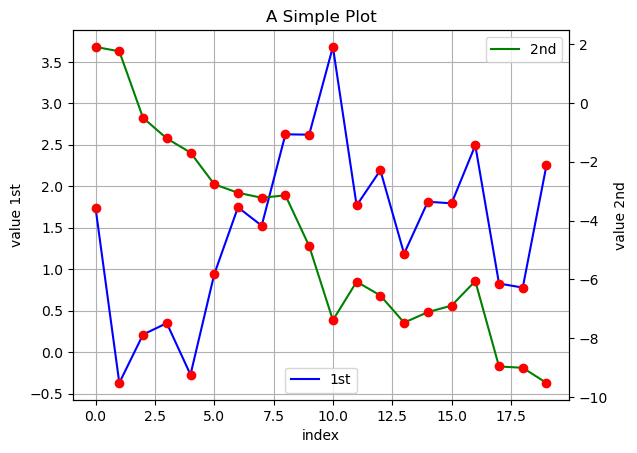

In [32]:
import matplotlib.pyplot as plt
fig,ax1=plt.subplots()
plt.plot(y[:,0],'b',lw=1.5,label='1st')
plt.plot(y[:,0],'ro')
plt.grid(True)
plt.legend(loc=8)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value 1st')
plt.title('A Simple Plot')
ax2=ax1.twinx()
plt.plot(y[:,1],'g',lw=1.5,label='2nd')
plt.plot(y[:,1],'ro')
plt.legend(loc=0)
plt.ylabel('value 2nd')

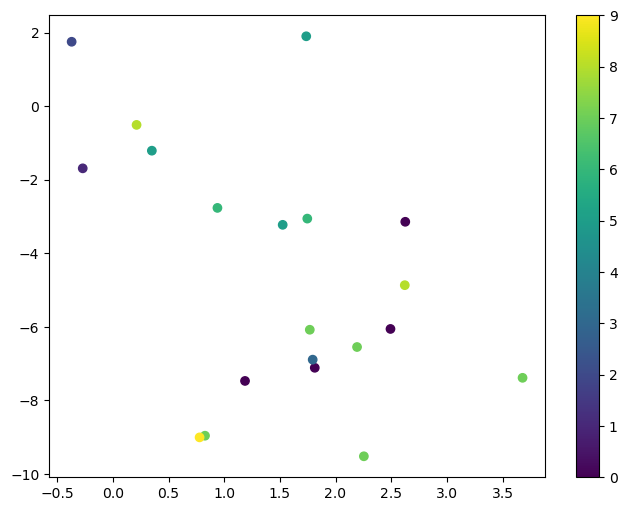

In [33]:
plt.figure(figsize=(8,6))

plt.scatter(y[:,0],y[:,1],c=np.random.randint(0,10,len(y)),marker='o')
plt.colorbar()


(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 3., 3.,
         2., 7., 3., 1.],
        [3., 0., 0., 4., 1., 2., 0., 1., 0., 3., 1., 1., 1., 2., 3., 3.,
         2., 9., 3., 1.]]),
 array([-9.51643749, -8.85665508, -8.19687266, -7.53709025, -6.87730783,
        -6.21752542, -5.557743  , -4.89796058, -4.23817817, -3.57839575,
        -2.91861334, -2.25883092, -1.59904851, -0.93926609, -0.27948368,
         0.38029874,  1.04008115,  1.69986357,  2.35964599,  3.0194284 ,
         3.67921082]),
 <a list of 2 BarContainer objects>)

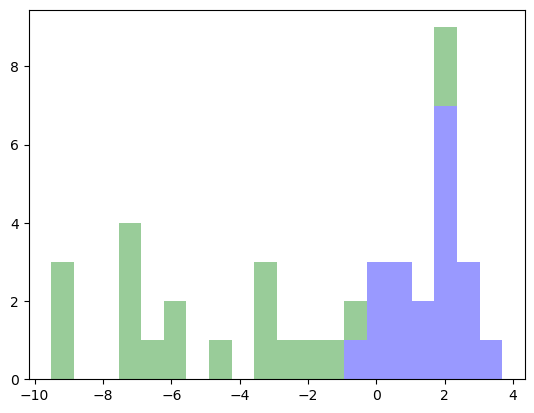

In [36]:
plt.hist(y,label=['1st','2nd'],color=['b','g'],stacked=True,bins=20,alpha=0.4)

[Text(0, 1.824360635350064, '$f(a)$'), Text(0, 3.2408445351690323, '$f(b)$')]

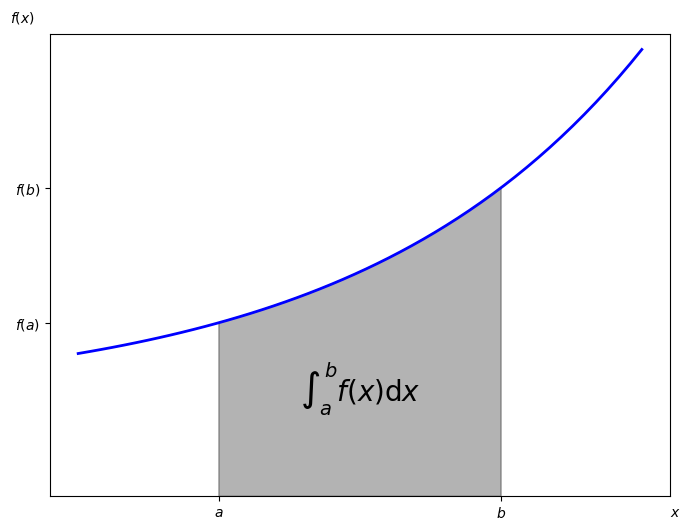

In [39]:
from matplotlib.patches import Polygon

def func(x):
    return 0.5*np.exp(x)+1

a,b=0.5,1.5
x=np.linspace(0,2)
y=func(x)

fig,ax=plt.subplots(figsize=(8,6))
plt.plot(x,y,'b',lw=2)
plt.ylim(ymin=0)

Ix=np.linspace(a,b)
Iy=func(Ix)
verts=[(a,0)]+list(zip(Ix,Iy))+[(b,0)]
poly=Polygon(verts,facecolor='0.7',edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.5*(a+b),1,r"$\int_a^b f(x)\mathrm{d}x$",horizontalalignment='center',fontsize=20)
plt.figtext(0.9,0.075,'$x$')
plt.figtext(0.075,0.9,'$f(x)$')

ax.set_xticks((a,b))
ax.set_xticklabels(('$a$','$b$'))
ax.set_yticks([func(a),func(b)])
ax.set_yticklabels(('$f(a)$','$f(b)$'))



# 金融学图表

In [44]:

import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

df=pdr.get_data_yahoo('^GDAXI',start='2014-05-01',end='2014-06-30')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-05-02,9611.790039,9627.379883,9533.299805,9556.019531,9556.019531,88062300
2014-05-05,9536.379883,9548.169922,9407.089844,9529.500000,9529.500000,61911600
2014-05-06,9570.250000,9571.629883,9440.469727,9467.530273,9467.530273,82062900
2014-05-07,9418.500000,9554.349609,9410.080078,9521.299805,9521.299805,92732600
2014-05-08,9547.269531,9622.299805,9487.570312,9607.400391,9607.400391,102022500
2014-05-09,9591.320312,9602.860352,9558.110352,9581.450195,9581.450195,80084100
2014-05-12,9608.929688,9710.339844,9587.139648,9702.459961,9702.459961,87508500
2014-05-13,9751.049805,9783.719727,9732.339844,9754.429688,9754.429688,96844100
2014-05-14,9765.620117,9772.089844,9733.209961,9754.389648,9754.389648,76079000


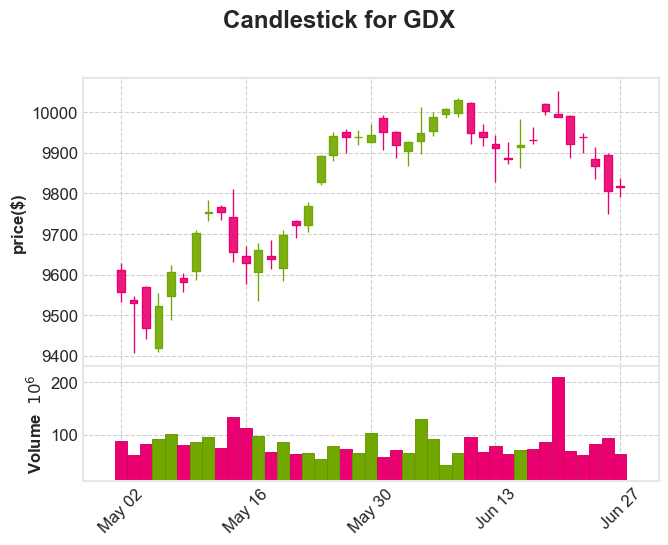

In [57]:
import mplfinance as mpf


mpf.plot(df,type='candle',title='Candlestick for GDX',ylabel='price($)',style='binance',volume=True)



# 3D绘图

人为生成一个类似波动率平面的图表

1.行权价格在50-150之间

2.到期日在0.5-2.5年之间


In [59]:
strike=np.linspace(50,150,24)
ttm=np.linspace(0.5,2.5,24)

strike,ttm=np.meshgrid(strike,ttm)#创造一个二维坐标系



In [60]:
#模拟一个隐含波动率
iv=(strike-100)**2/(100*strike)/ttm

C:\Users\15295\AppData\Local\Temp\ipykernel_8328\529366386.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


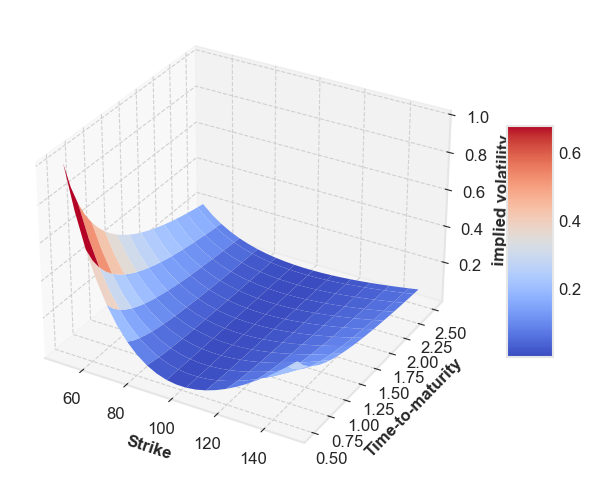

In [67]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig=plt.figure(figsize=(9,6))
ax=fig.gca(projection='3d')

surf=ax.plot_surface(strike,ttm,iv,rstride=2,cstride=2,cmap=plt.cm.coolwarm,linewidth=0.5,antialiased=True)

ax.set_xlabel('Strike')
ax.set_ylabel('Time-to-maturity')
ax.set_zlabel('implied volatility')

fig.colorbar(surf,shrink=0.5,aspect=5)

plt.show()


Text(0.5, 0, 'implied vol')

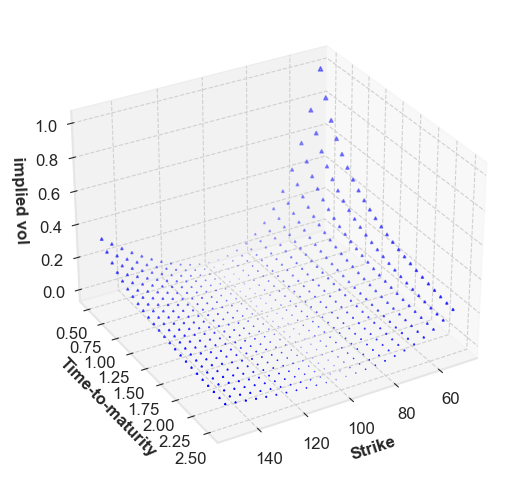

In [68]:
fig=plt.figure(figsize=(9,6))
ax=fig.add_subplot(111,projection='3d')
ax.view_init(30,60)

ax.scatter(strike,ttm,iv,zdir='z',s=iv*10,c='b',marker='^')
ax.set_xlabel('Strike')
ax.set_ylabel('Time-to-maturity')
ax.set_zlabel('implied vol')

金融时间序列


In [70]:
import pandas as pd

dates=pd.date_range('2015-01-01',periods=9,freq='M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [74]:
DAX=pdr.get_data_yahoo('^GDAXI',start='2000-01-01',end='2010-01-01')

[*********************100%***********************]  1 of 1 completed


In [75]:
DAX

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,6961.720215,7159.330078,6720.870117,6750.759766,6750.759766,43072500
2000-01-04,6747.240234,6755.359863,6510.459961,6586.950195,6586.950195,46678400
2000-01-05,6585.850098,6585.850098,6388.910156,6502.069824,6502.069824,52682800
2000-01-06,6501.450195,6539.310059,6402.629883,6474.919922,6474.919922,41180600
2000-01-07,6489.939941,6791.529785,6470.140137,6780.959961,6780.959961,56058900
...,...,...,...,...,...,...
2009-12-22,5939.200195,5981.979980,5929.669922,5945.689941,5945.689941,82250700
2009-12-23,5966.109863,5988.279785,5935.140137,5957.439941,5957.439941,59900800
2009-12-28,5977.990234,6011.279785,5977.990234,6002.919922,6002.919922,38247200


<AxesSubplot:xlabel='Date'>

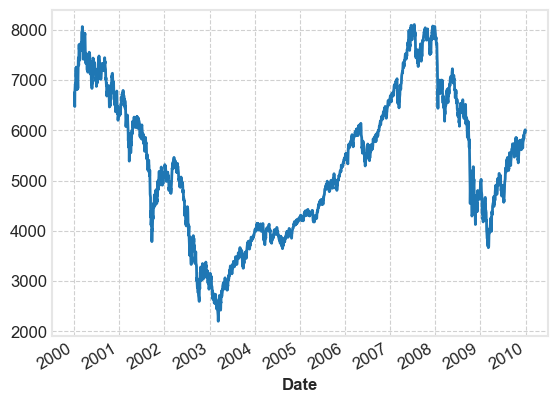

In [76]:
DAX['Close'].plot()

In [78]:
DAX['Ret_loop']=0

DAX['Ret_loop']=np.log(DAX['Close']/DAX['Close'].shift(1))
    

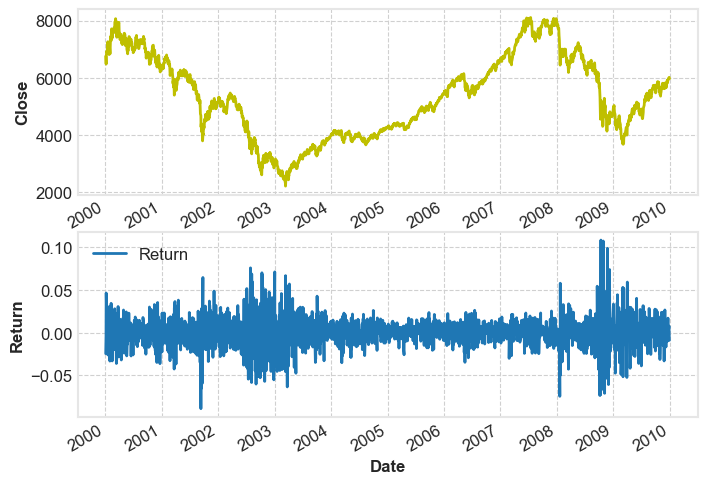

In [84]:
plt.subplot(211)
DAX['Close'].plot(figsize=(8,6),label='Close',color='y')
plt.ylabel('Close')
plt.subplot(212)
DAX['Ret_loop'].plot(figsize=(8,6),label='Return')
plt.ylabel('Return')
plt.legend()

<AxesSubplot:xlabel='Date'>

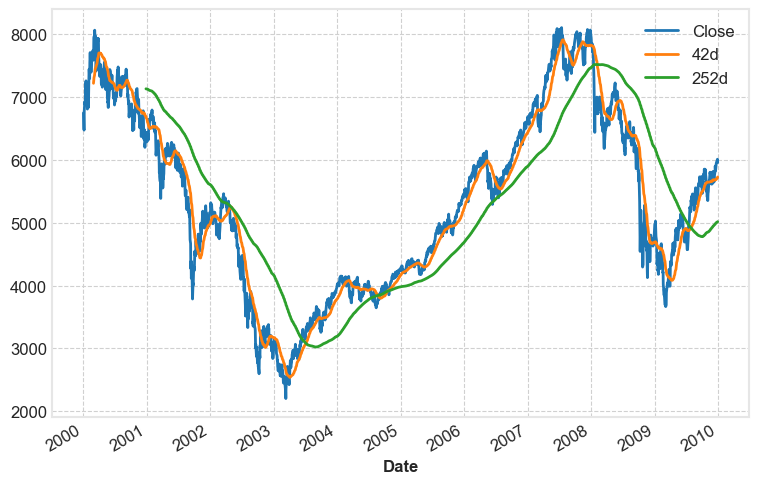

In [85]:
DAX['42d']=DAX.Close.rolling(window=42).mean()
DAX['252d']=DAX.Close.rolling(window=252).mean()
DAX[['Close','42d','252d']].plot(figsize=(9,6))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

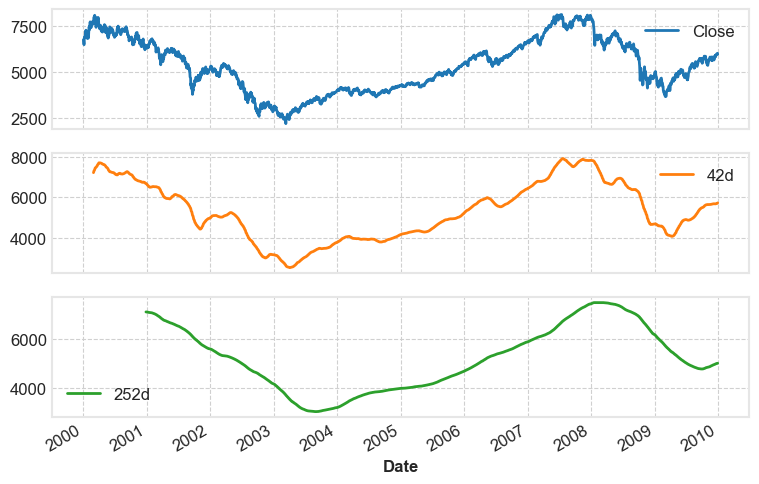

In [87]:
DAX[['Close','42d','252d']].plot(figsize=(9,6),subplots=True)

In [1]:
import pandas as pd


lines=open('C:\\Users\\15295\\Desktop\\量化金融\\financepy-master\\part1\\ch06\\es.txt','r').readlines()
lines=[line.replace(' ','') for line in lines]

In [2]:
lines

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n',
 '06.01.1987;775.92;902.32;83.28;99.19;98.83;69.50;652.49;66.06\n',
 '07.01.1987;781.21;899.15;83.78;98.96;98.62;70.59;651.97;66.20\n',
 '08.01.1987;777.62;887.37;83.52;97.87;97.68;71.01;645.57;65.62\n',
 '09.01.1987;769.80;868.31;83.03;96.31;96.22;71.40;638.03;65.14\n',
 '12.01.1987;775.07;879.41;83.64;97.54;97.18;71.50;634.14;65.03\n',
 '13.01.1987;770.00;872.74;83.00;96.78;96.38;70.97;622.44;63.87\n',
 '14.01.1987;772.04;876.39;82.99;97.14;96.59;70.66;603.63;62.46\n',
 '15.01.1987;779.12;884.37;83.77;98.10;97

In [4]:
for line in lines[3883:3890]:
    print(line[41:])

317.10;267.23;5268.36;363.19

322.55;272.18;5360.52;370.94

322.69;272.95;5360.52;370.94

327.57;277.68;5479.59;378.69;

329.94;278.87;5585.35;386.99;

326.77;272.38;5522.25;380.09;

332.62;277.08;5722.57;396.12;



In [6]:
new_file=open('C:\\Users\\15295\\Desktop\\量化金融\\financepy-master\\part1\\ch06\\es50.txt','w')
new_file.writelines('date'+lines[3][:-1]+';DEL'+lines[3][-1])
new_file.writelines(lines[4:])
new_file.close()

new_file=open('C:\\Users\\15295\\Desktop\\量化金融\\financepy-master\\part1\\ch06\\es50.txt','r').readlines()
new_file[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [31]:
es=pd.read_csv('C:\\Users\\15295\\Desktop\\量化金融\\financepy-master\\part1\\ch06\\es50.txt',index_col=0,parse_dates=True,sep=';',dayfirst=True)

In [32]:
es

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
1986-12-31,775.00,900.82,82.76,98.58,98.06,69.06,645.26,65.56,NaN
1987-01-01,775.00,900.82,82.76,98.58,98.06,69.06,645.26,65.56,NaN
1987-01-02,770.89,891.78,82.57,97.80,97.43,69.37,647.62,65.81,NaN
1987-01-05,771.89,898.33,82.82,98.60,98.19,69.16,649.94,65.82,NaN
1987-01-06,775.92,902.32,83.28,99.19,98.83,69.50,652.49,66.06,NaN
...,...,...,...,...,...,...,...,...,...
2015-05-11,3473.89,3624.41,401.34,373.69,467.51,416.54,10892.17,648.81,NaN
2015-05-12,3427.95,3573.10,396.09,369.05,461.89,410.86,10715.11,638.41,NaN
2015-05-13,3413.61,3553.42,395.46,367.92,461.33,410.73,10804.75,643.13,NaN


In [20]:
del es['DEL']

KeyError: 'DEL'

In [24]:
vs=pd.read_csv('C:\\Users\\15295\\Desktop\\量化金融\\financepy-master\\part1\\ch06\\vs.txt',parse_dates=True,header=2,index_col=0,sep=',',dayfirst=True)

In [25]:
vs

,V2TX,V6I1,V6I2,V6I3,V6I4,V6I5,V6I6,V6I7,V6I8
Date,,,,,,,,,
1999-01-04,18.2033,21.2458,17.5555,31.2179,33.3124,33.7327,33.2232,31.8535,23.8209
1999-01-05,29.6912,36.6400,28.4274,32.6922,33.7326,33.1724,32.8457,32.2904,25.0532
1999-01-06,25.1670,25.4107,25.1351,32.2186,32.6459,31.9673,32.9260,33.2871,26.0107
1999-01-07,32.5205,35.4410,32.2004,36.1265,34.5150,33.1095,33.2843,33.7269,26.2205
1999-01-08,33.2296,35.8846,33.0020,36.0813,36.3964,33.4658,33.4837,33.9227,26.3672
...,...,...,...,...,...,...,...,...,...
2015-05-11,21.8358,25.6132,21.7019,21.6330,21.9186,21.9948,21.8476,22.3685,22.2468
2015-05-12,23.2326,28.6669,23.1051,22.7620,22.8524,22.6335,22.2504,22.6706,22.5640
2015-05-13,23.0546,26.1411,23.0165,22.7599,22.6617,22.5652,22.3507,22.7234,22.4998


In [33]:
import datetime as dt
data=pd.DataFrame({'EUROSTOXX':
                  es['SX5E'][pd.to_datetime(es.index)>dt.datetime(1999,1,1)]})
data=data.join(pd.DataFrame({'VSTOXX':
                            vs['V2TX'][pd.to_datetime(vs.index)>dt.datetime(1999,1,1)]}))



In [34]:
data

,EUROSTOXX,VSTOXX
date,,
1999-01-04,3543.10,18.2033
1999-01-05,3604.67,29.6912
1999-01-06,3685.36,25.1670
1999-01-07,3627.87,32.5205
1999-01-08,3616.57,33.2296
...,...,...
2015-05-11,3624.41,21.8358
2015-05-12,3573.10,23.2326
2015-05-13,3553.42,23.0546


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

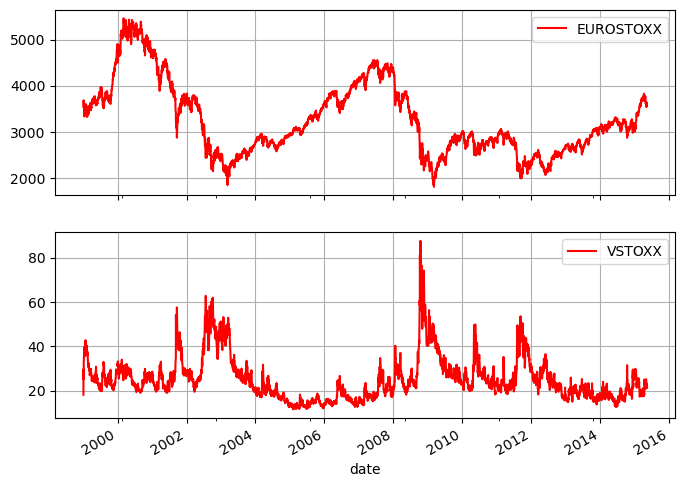

In [37]:
data.plot(subplots=True,grid=True,style='r',figsize=(8,6))

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

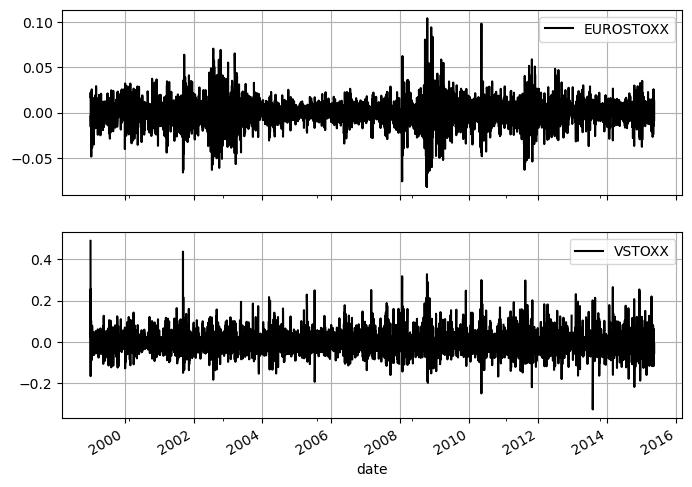

In [38]:
import numpy as np
rets=np.log(data/data.shift(1))
rets.plot(subplots=True,grid=True,style='k',figsize=(8,6))

In [41]:
rets.dropna(inplace=True)

In [46]:
import statsmodels.api as smf

xdat=rets['EUROSTOXX']
ydat=rets['VSTOXX']

xdat=smf.add_constant(xdat)

model=smf.OLS(ydat,xdat)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 VSTOXX   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     4781.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:03:01   Log-Likelihood:                 7519.6
No. Observations:                4137   AIC:                        -1.504e+04
Df Residuals:                    4135   BIC:                        -1.502e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.305      0.761      -0.001       0.001
EUROSTOXX     -2.8035      0.041    -69.145      0.000      -2.883      -2.724
==============================================================================
Omnibus:                     1304.289   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25898.021
Skew:                           1.004   Prob(JB):                         0.00
Kurtosis:                      15.092   Cond. No.                         66.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
results.params

const       -0.000186
EUROSTOXX   -2.803456
dtype: float64

Text(0, 0.5, 'VSTOXX returns')

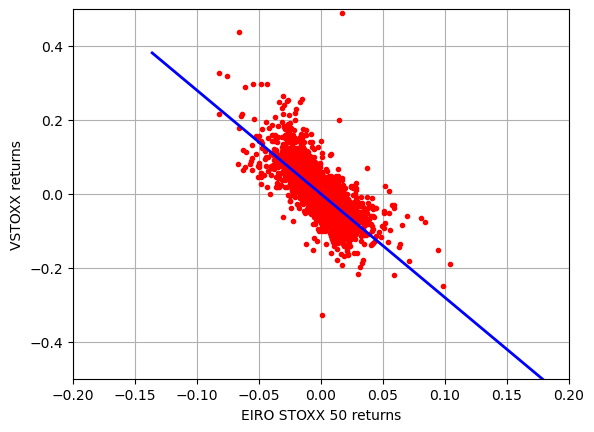

In [52]:
import matplotlib.pyplot as plt


plt.plot(xdat,ydat,'r.')
ax=plt.axis()
x=np.linspace(ax[0],ax[1]+0.01)
plt.plot(x,results.params[0]+results.params[1]*x,'b',lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlim(-0.2,0.2)
plt.ylim(-0.5,0.5)
plt.xlabel('EIRO STOXX 50 returns')
plt.ylabel('VSTOXX returns')

In [53]:
rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.732277
VSTOXX,-0.732277,1.000000


<AxesSubplot:xlabel='date'>

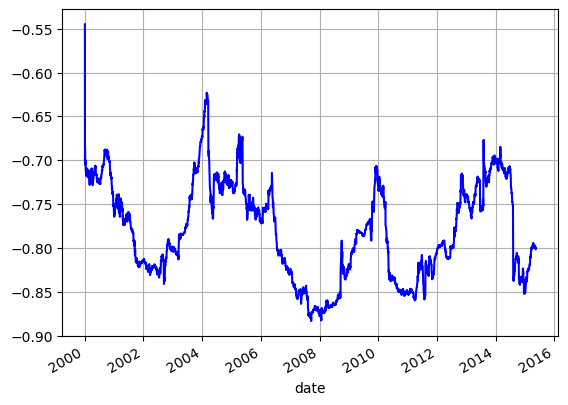

In [56]:
#显示不同时期的相关性
rets['EUROSTOXX'].rolling(window=252).corr(rets['VSTOXX']).plot(grid=True,style='b')